<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/ProjekAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Text(0.5, 1.0, 'Threshold')

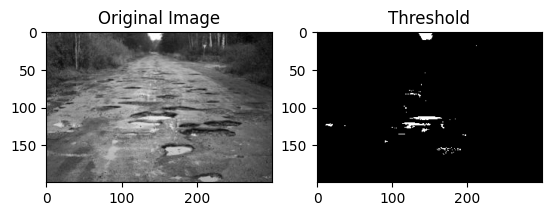

In [55]:
img = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/3.jpg')
# img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret,thresh1 = cv.threshold(img_gray,200,255,cv.THRESH_BINARY)

plt.subplot(2,2,1),plt.imshow(img_gray,'gray')
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(thresh1,'gray')
plt.title('Threshold')
     

In [67]:
def color_segmentation(image, lower_hsv, upper_hsv):
    # Konversi gambar ke mode warna HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    
    # Buat mask dengan batasan warna yang ditentukan
    mask = cv.inRange(hsv_image, lower_hsv, upper_hsv)
    
    # Aplikasikan mask ke gambar asli
    segmented_image = cv.bitwise_and(image, image, mask=mask)
    
    return segmented_image

lower_hsv = np.array([0, 100, 100])
upper_hsv = np.array([10, 255, 255])

segmented_image = color_segmentation(thresh1, lower_hsv, upper_hsv)

cv2_imshow( img)

error: ignored